In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1 - Modeling GNP

#### We consider the gnp data from the astsa package.

In [2]:
gnp = pd.read_csv('gnp_dataset.csv')

In [3]:
gnp['date'] = [1947 + x for x in np.arange(0,(2002.75-1947), step=.25)]

### **a. Produce a time series plot of the gnp data. Is the data stationary? Is there evidence of any trends or seasonality? Propose steps to obtain stationary data.**

##### The data is clearly not stationary. There is a consistent, upward trend, but no clear evidence of seasonality. Stationary data can sometimes be obtained using differencing methods or data transformations (sqrt, log, box-cox, etc).

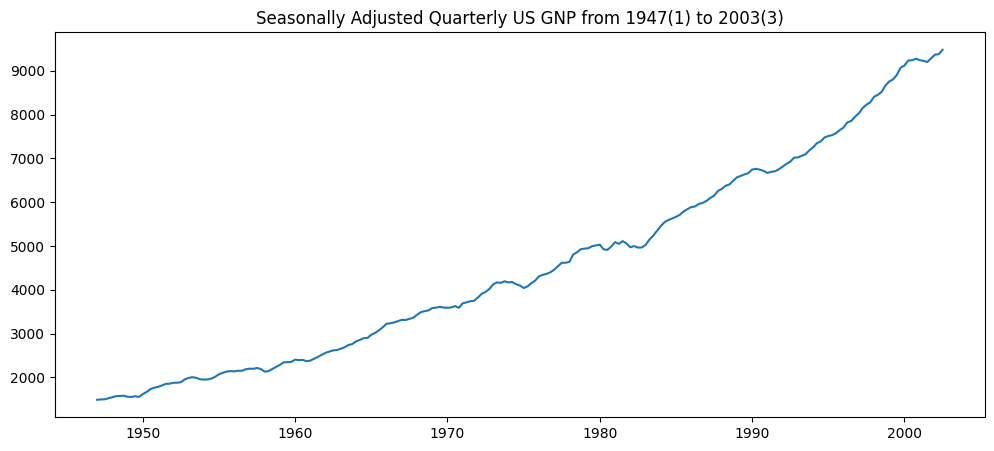

In [4]:
plt.figure(figsize=(12,5))
plt.plot(gnp['date'],gnp['x'])
plt.title('Seasonally Adjusted Quarterly US GNP from 1947(1) to 2003(3)')
plt.show()

### b. Take the log differences of the data and produce a second time series plot. What impact has this particular transformation had on the time series? Does the time series now appear stationary?

##### After both transformations, the upward trend has now been removed. Now, the mean and variance seem reasonably constant over time. However, the variance seems reduced towards the end, which could indicate non-stationarity.

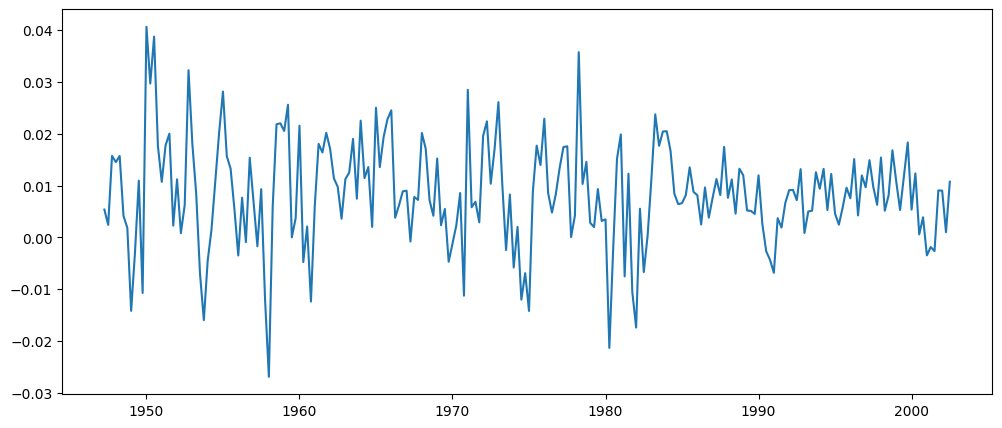

In [5]:
gnp['log'] = np.log(gnp['x'])
gnp['log_difference'] = gnp['log'].diff()

plt.figure(figsize=(12,5))
plt.plot(gnp['date'],gnp['log_difference'])
plt.show()

### c. Produce both an ACF plot and a PACF plot of the transformed data. What are your observations?

##### The ACF plot indicates that only the first two lags are significant, while the PACF shows only h=1 as significant.

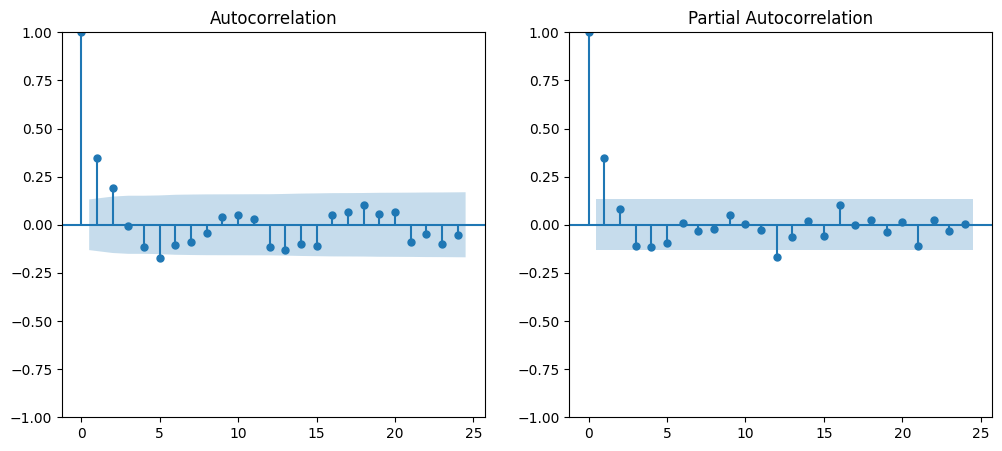

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

plot_acf(gnp['log_difference'][1:], ax=ax[0]);
plot_pacf(gnp['log_difference'][1:], ax=ax[1]);

### d. First, fit an MA(2) model using the Arima() function below from the forecast package and name it ma.model. Obtain a summary of our model using the summary function. What are the values of the coeﬀicients 𝜃1 and 𝜃2?

##### $\theta_1=.3067$ and $\theta_2=.2249$

In [7]:
ma_model = ARIMA(gnp['log_difference'], order=(0,0,2)).fit() #Form of an MA(2) model
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         log_difference   No. Observations:                  223
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 719.908
Date:                Sun, 04 Feb 2024   AIC                          -1431.816
Time:                        20:20:14   BIC                          -1418.188
Sample:                             0   HQIC                         -1426.315
                                - 223                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.001      8.389      0.000       0.006       0.010
ma.L1          0.3067      0.054      5.649      0.000       0.200       0.413
ma.L2          0.2249      0.056      4.028      0.000       0.115       0.334
sigma2       8.92e-05   6.49e-06     13.752      0.000    7.65e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                22.49
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### e. Evaluate the fit of your model by producing a plot of the residuals as well as an ACF plot. From this cursory inspection does our model appear to be a good fit? Why?

##### It seems to be a good model since the residuals resemble IID noise and the ACF plot shows no significant correlation between residuals.

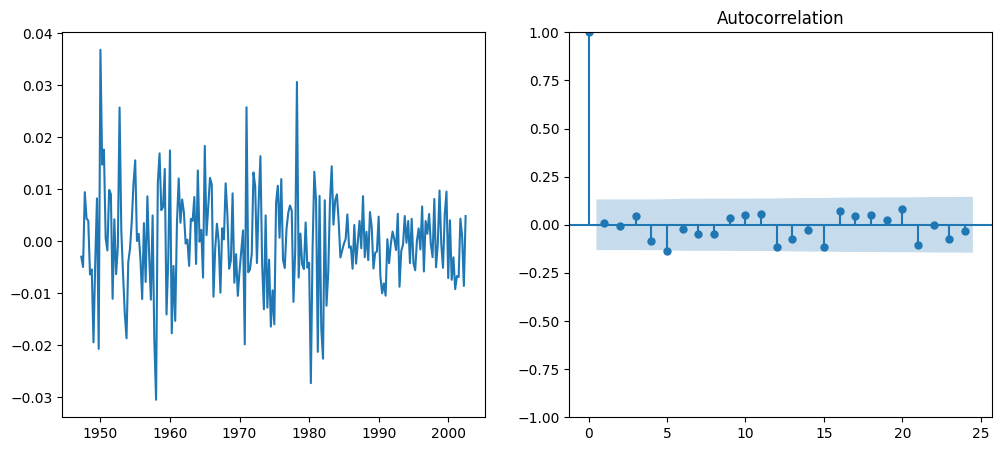

In [8]:
residuals = ma_model.resid[1:]

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(gnp['date'][1:], residuals)
plot_acf(residuals, ax=ax[1]);
plt.show()

### f. Repeat (d) and (e) but this time fit an AR(1) model, naming it ar.model and stating the value of coeﬀicient 𝜙1

##### $\phi_1=.3481$

In [9]:
ar_model = ARIMA(gnp['log_difference'], order=(1,0,0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         log_difference   No. Observations:                  223
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 718.610
Date:                Sun, 04 Feb 2024   AIC                          -1431.220
Time:                        20:20:15   BIC                          -1420.999
Sample:                             0   HQIC                         -1427.094
                                - 223                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.001      8.297      0.000       0.006       0.010
ar.L1          0.3481      0.055      6.288      0.000       0.240       0.457
sigma2      9.023e-05   6.47e-06     13.943      0.000    7.76e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                24.36
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### g. Produce a plot of the original transformed data series with both fitted model values over-layed in different colors. The fitted model values can be obtained using ma.model$fitted and ar.model$fitted.

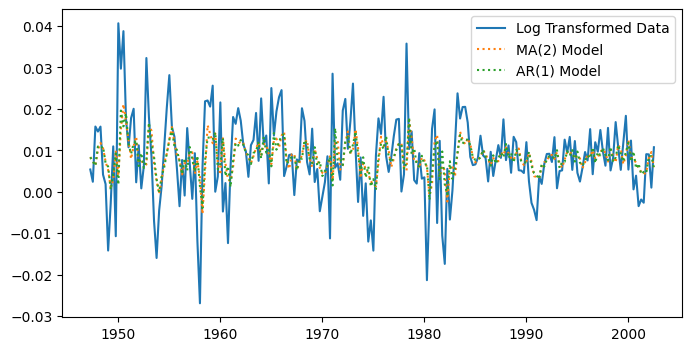

In [15]:
plt.figure(figsize=(8,4))
plt.plot(gnp['date'][1:], gnp['log_difference'][1:], label='Log Transformed Data')
plt.plot(gnp['date'][1:], ma_model.fittedvalues[1:], label='MA(2) Model', ls=':')
plt.plot(gnp['date'][1:], ar_model.fittedvalues[1:], label='AR(1) Model', ls=':')
plt.legend()
plt.show()

# Question 2 - Modeling Global Temperature

### We consider the xglobtemp data from the astsa package. Our aim is to fit an appropriate ARIMA(p,d,q) model and to evaluate our model’s performance using residual diagnostics before constructing a 10 year ahead forecast

### a. Load the data and produce a time series plot. Is the data stationary? Comment on any possible linear or seasonal trends and how best to remove them.

### b. Difference the data lag 1 and produce a new time series plot. Does the data now appear stationary?

### c. Produce both an ACF and a PACF of the log-differenced data and comment on your observations. What potential ARIMA(p,d,q) models do they suggest?

### d. This time use the sarima() function from the astsa package to fit your selected ARIMA model. Use the residual analysis plots it produces to determine the goodness-of-fit of our model.

### e. Using our final model produce a 10 year ahead forecast for global temperature using the sarima.for() function from the astsa package. Comment on your forecast.